># Inro to Seaborn 

In [176]:
# load libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [177]:
sns.set(style="darkgrid")
sns.set_palette("flare")
sns.set_context("notebook")

In [178]:
sns.set(rc={'figure.figsize':(7,7)},font_scale=1.2) # set figure size and font size

>> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [179]:
# load dataset
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


>> ## _count plot_
>> A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.

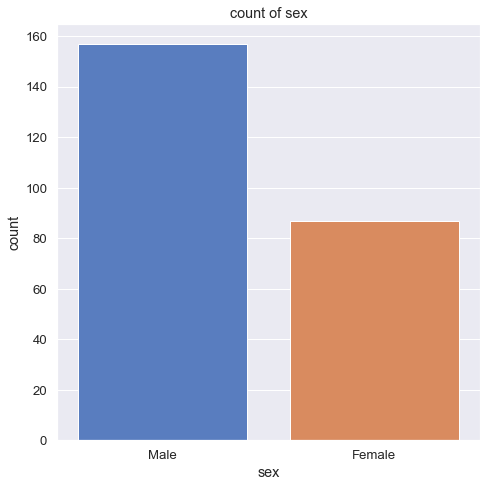

In [180]:
sns.countplot(x="sex",data=df,palette="muted")

plt.title("count of sex")
plt.tight_layout()
plt.show()

>> ## _scatter plot_

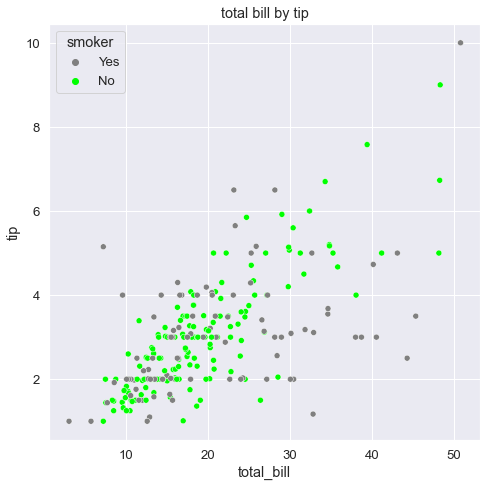

In [181]:
hue_colors = {'Yes': '#808080','No': '#00FF00'} 
sns.scatterplot(x="total_bill",
                y="tip",
                data=df,
                hue="smoker", # hue: categorical variable to map plot aspects to different colors
                palette= hue_colors # palette: set color of plot
                )
                
plt.title("total bill by tip")
plt.tight_layout()
plt.show()

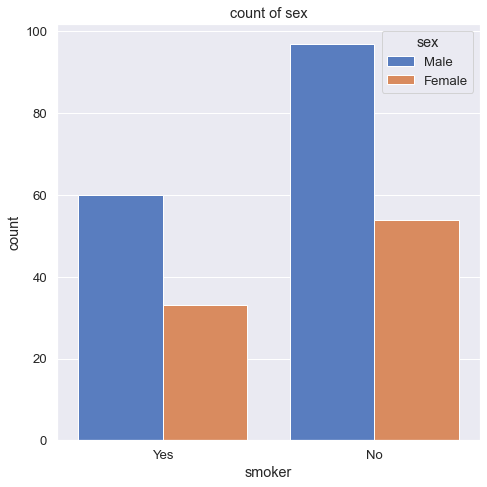

In [182]:
# we can also use hue with countplot to make subgroups of data
sns.countplot(x="smoker",data=df,palette="muted",hue="sex")

plt.title("count of sex")
plt.tight_layout()
plt.show()

>> _relplot()_ is a figure-level interface for drawing relational plots onto a FacetGrid , The primary purpose of relplot() is to create scatter plots, line plots, and other relational plots that show the relationship between two or more variables. It can also be used to create subplots that show different relationships or facets within a dataset.

### there is deffrence between count plot and bar plot 
__count plot is used to count the number of instances of each value in a column and bar plot is used to show the mean of a numeric column grouped by a categorical column.__
we can spicify estimator in bar plot to change the default mean to another function like sum or count or any other function 
- estimator = np.mean
- estimator = np.median
- estimator = any_function  -> this function i can pass y valuse as parameter to it 

### _the notches on the plot represent the confidence interval (CI) around the mean. The confidence interval is calculated using a bootstrap; for each sample, a mean is calculated, then a confidence interval is calculated based on the distribution of means. The default confidence interval is 95%, which is the most commonly used._

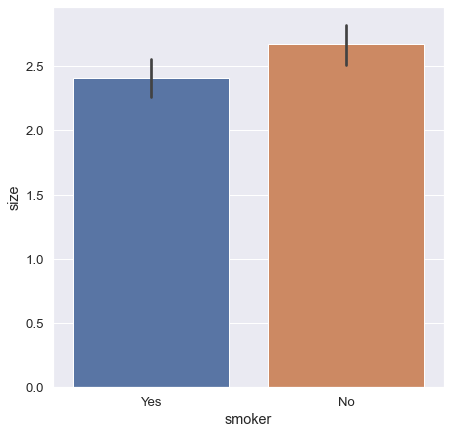

In [183]:
# load data set for line plot 
sns.barplot(x='smoker',y='size',data=df ) #
plt.show()

>>> ####  _scatter plot_ : A scatter plot of y vs x with varying marker size and/or color.

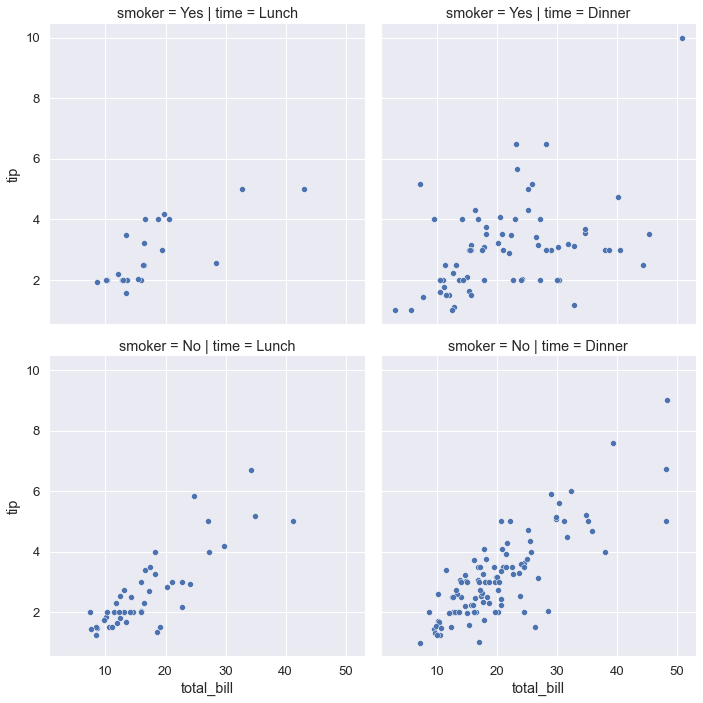

In [184]:
sns.relplot(data=df,
            x='total_bill',
            y='tip',
            kind='scatter', # kind: type of plot
            row='smoker', # row: categorical variable to make subgroups of data
            col = 'time'
            )
plt.tight_layout()
plt.show()

### _we can also use hue with relplot to make subgroups of data and use size to make a third dimension_
- each size value represit size of groub from size column

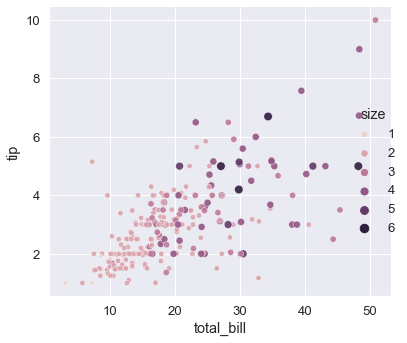

In [185]:
# what is the relation between total bill and tip with respect to size of group ?
sns.relplot(
            x='total_bill',
            y='tip',
            data=df,
            kind='scatter', # kind: type of plot
            hue='size', # hue: categorical variable to map plot aspects to different colors
            size='size', # size: categorical variable to map plot aspects to different sizes
            alpha=0.9 # alpha: transparency of plot
            )

plt.tight_layout()
plt.show()

### _we can also use style instad of hue to make subgroups of data and use size to make a third dimension_

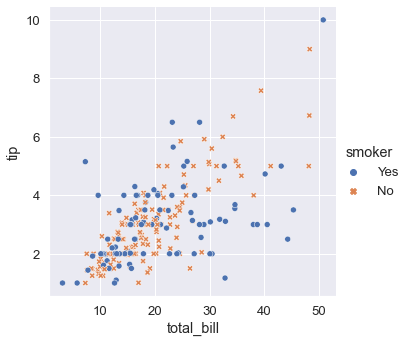

In [186]:
# what is the relation between total bill and tip with respect to if  smoker or not ?  
sns.relplot(x="total_bill",
            y="tip",
            data=df,
            kind='scatter',
            style='smoker', # style: categorical variable to map plot aspects to different styles
            hue = 'smoker', # hue: categorical variable to map plot aspects to different colors
            )

plt.show()

In [187]:
# mpg dataset 
mpg_data = sns.load_dataset('mpg')
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


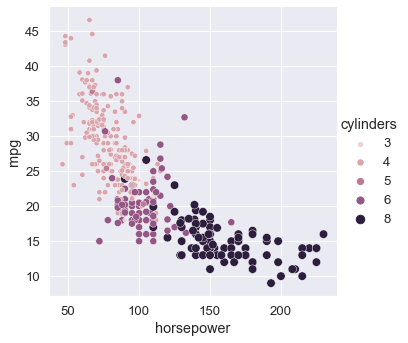

In [188]:
# what is the relation between horsepower and mpg with respect to cylinders ?

sns.relplot(x='horsepower',
            y='mpg',
            data=mpg_data,
            size = 'cylinders',
            hue = 'cylinders'
            )
plt.show()

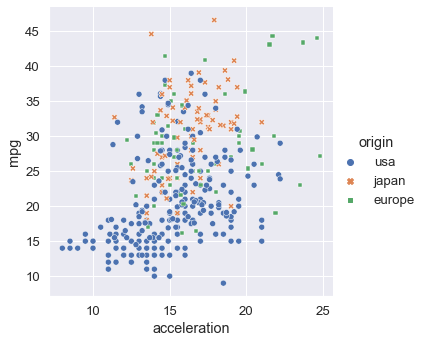

In [189]:

# what is relation between acceleration and mpg with respect to origin ?

sns.relplot(x='acceleration',
            y='mpg',
            data=mpg_data,
            style='origin',
            kind='scatter',
            hue='origin'
            )
plt.show()

>>> #### line plot : Draw a line plot with possibility of several semantic groupings.

### __Each plot point represents the same "thing", typically tracked over time__

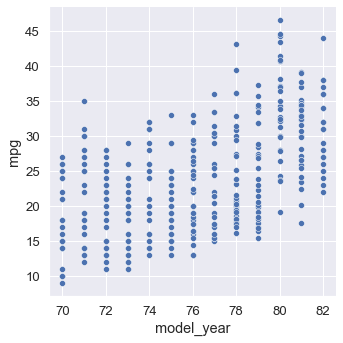

In [190]:
# we use line plot to show the relation between two numerical variables 
# and there is more one observation for each value of x as in the following example :
sns.relplot(x = 'model_year',y='mpg',data=mpg_data,)
plt.show()


*Multiple observations per x-value*
Shaded region is the confidence interval 
- Assumes dataset is a random sample of a larger population 
- 95% confidence that the mean of the population lies within the confidence interval of the sample mean 
- Indicates uncertainty in our estimate 

__the line is connected between mean of observations in each x value__

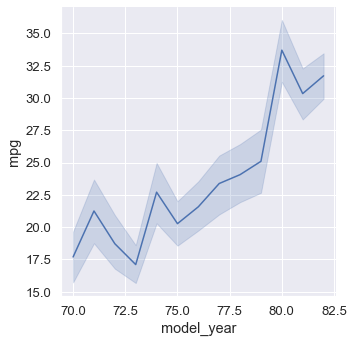

In [191]:
sns.relplot(x = 'model_year',y='mpg',data=mpg_data,kind='line') # kind: type of plot
plt.show()

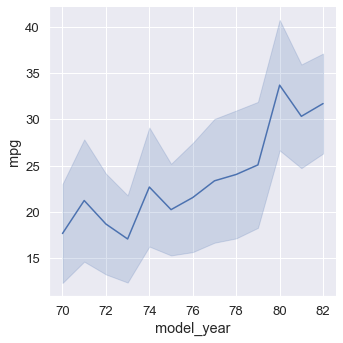

In [192]:
# I can chane confidence interval of line plot by ci parameter to be standard deviation not mean .
sns.relplot(x = 'model_year',y='mpg',data=mpg_data,kind='line',ci='sd') # ci: confidence interval
plt.show()

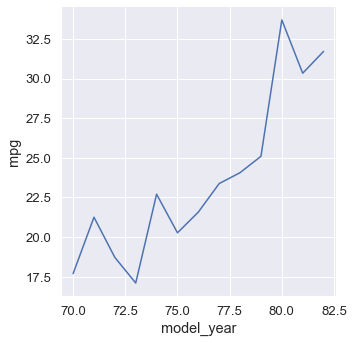

In [193]:
# i can remove confidence interval by ci parameter = None 
sns.relplot(x = 'model_year',y='mpg',data=mpg_data,kind='line',ci=None) # ci: confidence interval
plt.show()

>## __Visualizing a Categorical and a Quantitative Variable__

 >>### __count plots, bar plots__

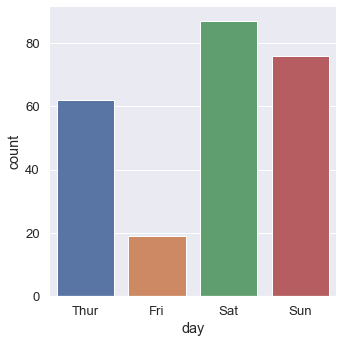

In [194]:
# catplot similar to rel plot but it is used for categorical variables 
# we can use catplot to show the relation between categorical variable and numerical variable
sns.catplot(x='day',data=df,kind='count') 
plt.show()

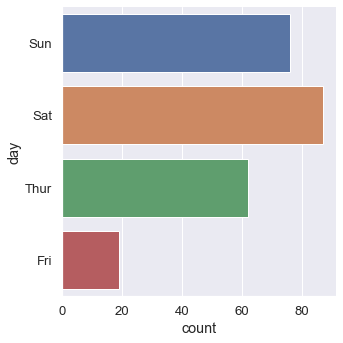

In [195]:
# i can it yo y axis by y parameter to make it horizontal 
# also i can order the days by order parameter 
dayes_order = ['Sun','Sat','Thur','Fri']
sns.catplot(y='day',data=df,kind='count',order=dayes_order)
plt.show()

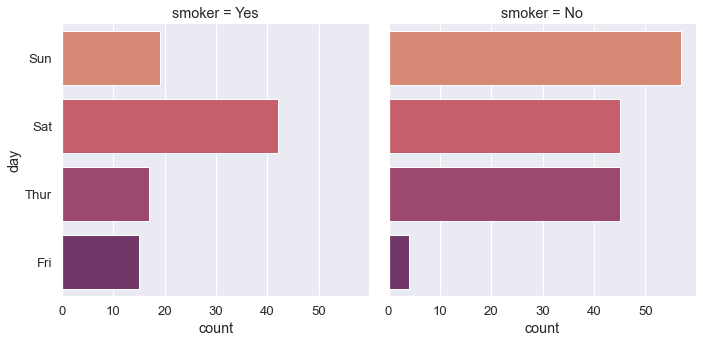

In [196]:
# i can split plot by another categorical variable by col parameter
sns.catplot(y='day',data=df,kind='count',order=dayes_order,col='smoker',palette='flare' )
plt.show()

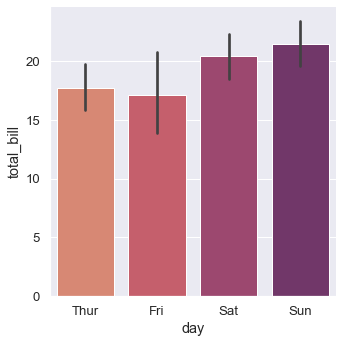

In [197]:
# bar plot is used to show the relation between categorical variable and numerical variable to show the mean of numerical variable as we saw before :
sns.catplot(x='day',y='total_bill',data=df,kind='bar',palette='flare' )
plt.show()


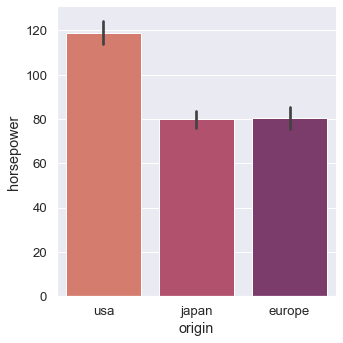

In [198]:
# relation between origin and mean horsepower using bar plot 
sns.catplot(x='origin',y='horsepower',data=mpg_data,kind='bar',palette='flare' ) 
plt.show() 

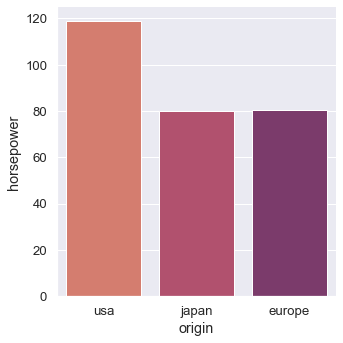

In [199]:
# relation between origin and mean horsepower using bar plot wittout confidence interval
sns.catplot(x='origin',y='horsepower',data=mpg_data,kind='bar',palette='flare' ,ci= None)   # type: ignore
plt.show() 

## __Box plot__ => _Side-by-side box plot_
>>To visualize (and compare) the distribution of a numerical variable across the levels of a categorical variable.
- Shows the distribution of quantitative data
- See median, spread, skewness, and outliers
- Facilitates comparisons between groups


Note : you can omit outliers in box plots by setting the sym parameter equal to an empty string (""). This is useful when you have a large number of outliers that would otherwise make the plot unreadable.

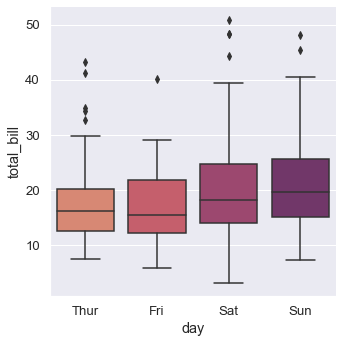

In [200]:
# box plot for deferrent values of categorical variable with respect to numerical variable :
sns.catplot(x='day',y='total_bill',data=df,kind='box',palette='flare' )
plt.show()

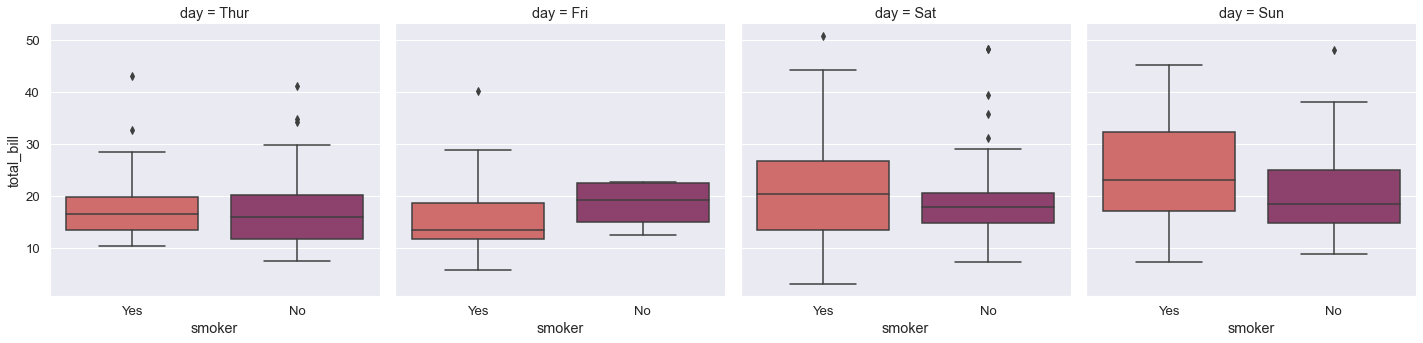

In [201]:
# try with tips dataset 
sns.catplot(x='smoker',y='total_bill',data=df,kind='box',col='day',palette='flare' ) 
plt.show()

## __point plot__ => _Point estimates and confidence intervals_

### What are point plots?

- Points show mean of quantitative variable 
- Vertical lines show 95% confidence intervals for the mean.

### _Point plots vs. line plots_

1- Both show:
 - Mean of quantitative variable.
 - 95% con,dence intervals for the mean.
  
2-  difference :
 - Line plot has quantitative variable (usually time) on x-axis.
 - Point plot has categorical variable on x-axis.

### _Point plots vs. bar plots_ 


-  In the point plot, it's easier to compare the heights of the subgroup points when they're stacked above each other. 


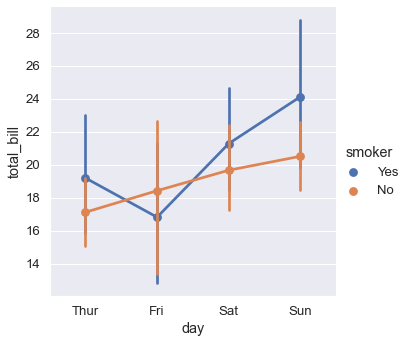

In [202]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="point", data=df) 
plt.show()

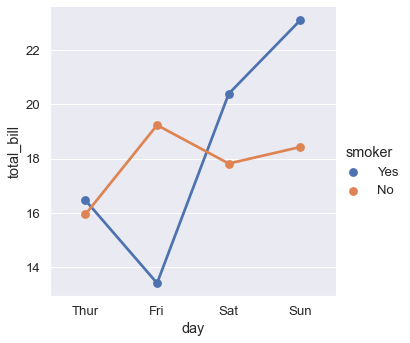

In [203]:
# we can change the estimator of point plot to be median instead of mean
# we can also remove confidence interval by ci parameter 
from numpy import median 
sns.catplot(x="day",
            y="total_bill", 
            hue="smoker",
            kind="point",
            data=df,
            estimator=median, # estimator: statistical function to estimate within each categorical bin 
            ci=False # ci: confidence interval 
            
            ) 
plt.show()

## __There is two types of seaborn objects :__ 
- #### _Axes-level functions_ : Each individual plot is on a separate axes =>  AxesSubplot [relplot() , catplot()] Can create subplots
- #### _facet-level functions_ : Each individual plot is on a separate facet => FacetGrid  [scatterplot() , countplot() , etc. Only creates a single plot]

<class 'seaborn.axisgrid.FacetGrid'>


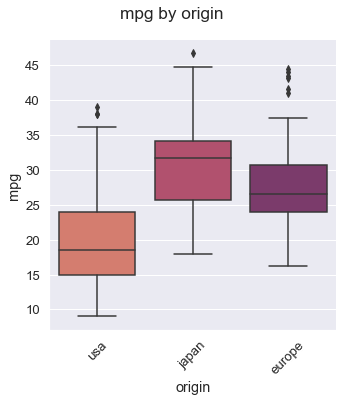

In [204]:
# adding title to facetgrid plot :
g = sns.catplot(x="origin",y="mpg",data=mpg_data,kind='box',palette='flare' )
print(type(g))
g.fig.suptitle("mpg by origin",
               y=1.05 # y: position of title
               )
plt.xticks(rotation=45) # rotate x axis labels
plt.show()

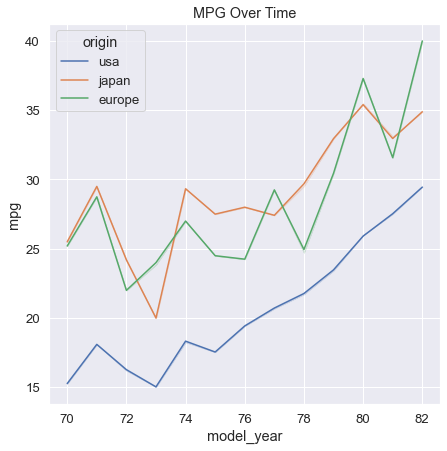

In [205]:
# Create line plot
g = sns.lineplot(x="model_year", y="mpg", 
                 data=mpg_data,
                 hue="origin",
                 ci = False)

# Add a title "MPG Over Time"
g.set_title("MPG Over Time") # set title fot AxisSubplot object

# Show plot
plt.show()